# PUNTO 1

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [42]:
def f(x, y):
    return 2*x - y

In [43]:
def g(x, y):
    return x + 2*y

In [44]:
def rk4(x, y, dt):
    k1x = dt * f(x, y)
    k1y = dt * g(x, y)
    k2x = dt * f(x + 0.5 * k1x, y + 0.5 * k1y)
    k2y = dt * g(x + 0.5 * k1x, y + 0.5 * k1y)
    k3x = dt * f(x + 0.5 * k2x, y + 0.5 * k2y)
    k3y = dt * g(x + 0.5 * k2x, y + 0.5 * k2y)
    k4x = dt * f(x + k3x, y + k3y)
    k4y = dt * g(x + k3x, y + k3y)
    
    x_n = x + (k1x + 2*k2x + 2*k3x + k4x) / 6
    y_n = y + (k1y + 2*k2y + 2*k3y + k4y) / 6
    
    return x_n, y_n

In [45]:
x0 = 1.0
y0 = 1.0
dt = 0.01  
tf = 10.0  

t_v = np.arange(0, tf, dt)
x_v = np.zeros_like(t_v)
y_v = np.zeros_like(t_v)
x_v[0] = x0
y_v[0] = y0

for i in range(1, len(t_v)):
    x_v[i], y_v[i] = rk4(x_v[i-1], y_v[i-1], dt)

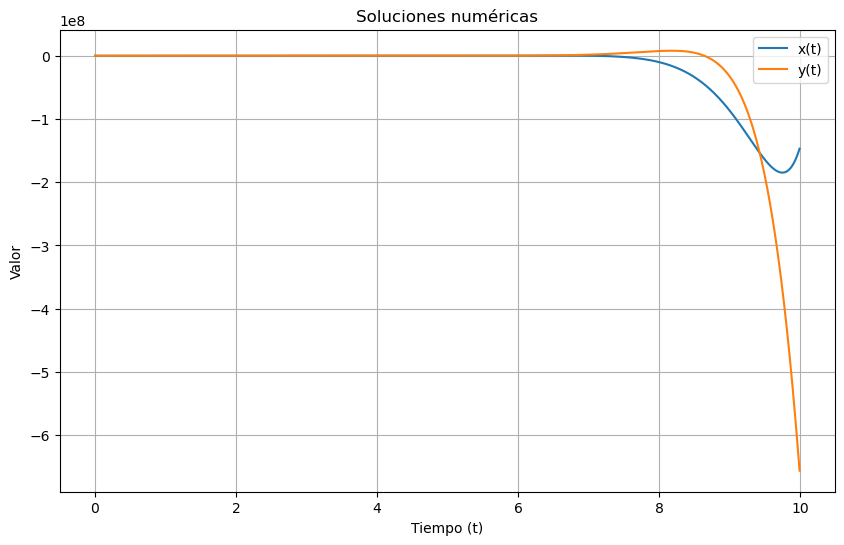

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(t_v, x_v, label='x(t)')
plt.plot(t_v, y_v, label='y(t)')
plt.xlabel('Tiempo (t)')
plt.ylabel('Valor')
plt.title('Soluciones numéricas')
plt.legend()
plt.grid(True)
plt.show()

### Para el sistema autónomo:

La matriz de estabilidad $\mathbf{A}$ correspondiente es:

$\mathbf{A} = \begin{bmatrix}
2 & -1 \\
1 & 2
\end{bmatrix}$

In [47]:
A = np.array([[2, -1],
              [1, 2]])

valoresp, vectoresp = np.linalg.eig(A)

print("Valores propios:", valoresp)
print("Vectores propios:\n", vectoresp)

Valores propios: [2.+1.j 2.-1.j]
Vectores propios:
 [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


In [48]:
X1 = np.array([0, 0])
pc = np.linalg.solve(A, X1)
pc

array([0., 0.])

In [51]:
print("Punto crítico:", pc[0],",", pc[1])

Punto crítico: 0.0 , 0.0


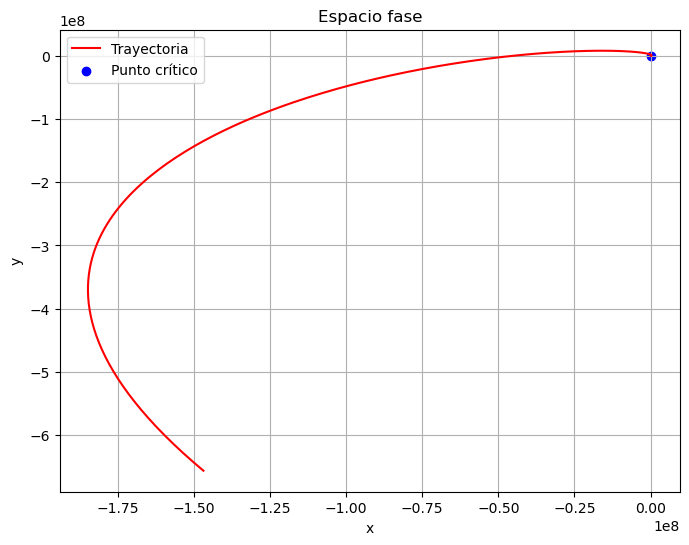

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(x_v, y_v, label='Trayectoria', color='red')
plt.scatter(pc[0], pc[1], color='blue', label='Punto crítico')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Espacio fase')
plt.grid(True)
plt.legend()
plt.show()
